In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

dados = pd.read_excel('/content/Rice_Cammeo_Osmancik.xlsx')
dados = dados.sample(frac=1, random_state=10).reset_index(drop=True)

X = sm.add_constant(dados.drop('Class', axis = 1))

y = dados.Class

# Converteremos as classes Cammeo para a classe negativa (0)e o Osmancik para a classe positiva (1).
y = y.replace({'Cammeo': 0, 'Osmancik': 1})
y = np.array(y, dtype = 'int')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [2]:
modelo = sm.Logit(y,X)
reg_log = modelo.fit()

Optimization terminated successfully.
         Current function value: 0.177987
         Iterations 10


In [3]:
print(reg_log.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3810
Model:                          Logit   Df Residuals:                     3802
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 May 2022   Pseudo R-squ.:                  0.7393
Time:                        19:13:24   Log-Likelihood:                -678.13
converged:                       True   LL-Null:                       -2601.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                37.2197     53.086      0.701      0.483     -66.826     141.266
Area                  0.0062      0.002      4.025      0.000       0.003       0.009
Perimeter             0.

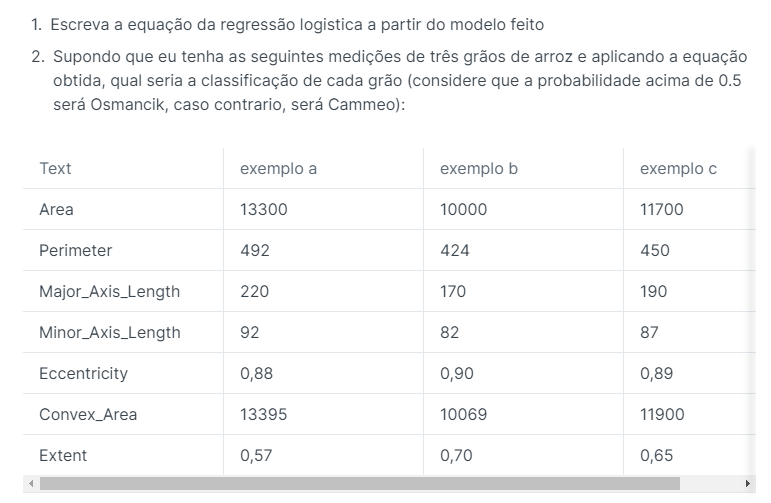

In [4]:
val = {
    'Area': [13300, 10000, 11700],
    'Perimeter': [492.0, 424, 450],
    'Major_Axis_Length': [220.0, 170, 190],
    'Minor_Axis_Length': [92.0, 82, 87],
    'Eccentricity': [0.88, 0.90, 0.89],
    'Convex_Area': [13395, 10069, 11900],
    'Extent': [0.57, 0.70, 0.65]
}

val = sm.add_constant(pd.DataFrame(val))
val

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,1.0,13300,492.0,220.0,92.0,0.88,13395,0.57
1,1.0,10000,424.0,170.0,82.0,0.90,10069,0.70
2,1.0,11700,450.0,190.0,87.0,0.89,11900,0.65


In [5]:
from statsmodels import stats
stats_predict = reg_log.predict(val)


stats_predict # Esses são os valores que devem ser comparados a saída da formula matemática 1/(1+e^(b0+b1*x1+...+bn*xn))

0    0.712234
1    0.999949
2    0.984246
dtype: float64

In [6]:
# Classificando cada nova observação

stats_predict += 1
stats_predict = round(stats_predict)
stats_predict -= 1

# Adiciona-se mais um para que a função round() tenha o comportamento esperado
# Essa função normalmente arredonda o valor central (0.5 por exemplo) para o numero par mais próximo
# Esse comportamento é inadequado para nossa classificação já que 0.5 deve ser considerado 1
# Ao adicionar 1, realizar o arredondamento e retirar 1, valores centrais dos intervalos são arredondados para cima
# Vale ressaltar que o valor 0.5 é extremamente raro, mas pode acontecer.

stats_predict = stats_predict.map({1:'Osmancik',
                                   0:'Cammeo'})

stats_predict

0    Osmancik
1    Osmancik
2    Osmancik
dtype: object

In [7]:
# Pela matematica

import math
# 1/(1+math.exp(-(37.2197 + 0.0062 + 0.0919 - 0.1511 + 0.2756 - 33.3234 - 0.0095 + 0.2658)))

print(1/(1+math.exp(-(37.2197 + 0.0062*13300 + 0.0919*492.0 - 0.1511*220.0 + 0.2756*92.0 - 33.3234*0.88 - 0.0095*13395 + 0.2658*0.57))))
print(1/(1+math.exp(-(37.2197 + 0.0062*10000 + 0.0919*424.0 - 0.1511*170.0 + 0.2756*82.0 - 33.3234*0.90 - 0.0095*10069 + 0.2658*0.70))))
print(1/(1+math.exp(-(37.2197 + 0.0062*11700 + 0.0919*450.0 - 0.1511*190.0 + 0.2756*87.0 - 33.3234*0.89 - 0.0095*11900 + 0.2658*0.65))))

# Diferenças acontecem por questões de arredondamentos e erros presentes em modelos estatisticos que se propagam e geram diferenças notaveis no resultado final
# Porém, a classificação ainda é precisa até certo ponto

0.6415536925073952
0.9999347356926743
0.9791196228849518


### Checanco os valores de X e criando função matemática para comparação

In [8]:
stats_predict = reg_log.predict(X)

stats_predict

0       0.005302
1       0.005965
2       0.986558
3       0.001915
4       0.957541
          ...   
3805    0.996919
3806    0.005908
3807    0.343027
3808    0.996989
3809    0.006105
Length: 3810, dtype: float64

In [9]:
# Classificando cada nova observação

stats_predict += 1
stats_predict = round(stats_predict)
stats_predict -= 1

stats_predict = stats_predict.map({1:'Osmancik',
                                   0:'Cammeo'})

stats_predict

0         Cammeo
1         Cammeo
2       Osmancik
3         Cammeo
4       Osmancik
          ...   
3805    Osmancik
3806      Cammeo
3807      Cammeo
3808    Osmancik
3809      Cammeo
Length: 3810, dtype: object

In [10]:
dados['Predito'] = stats_predict

dados

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Predito
0,15074,497.178009,205.639816,94.622200,0.887849,15536,0.721106,Cammeo,Cammeo
1,15454,500.897003,208.541595,95.323273,0.889418,15773,0.583434,Cammeo,Cammeo
2,11285,425.755005,175.424393,82.951385,0.881137,11525,0.750283,Osmancik,Osmancik
3,14331,495.143005,212.028961,86.861290,0.912235,14723,0.665784,Cammeo,Cammeo
4,11917,437.303986,179.576477,85.649315,0.878929,12192,0.639358,Osmancik,Osmancik
...,...,...,...,...,...,...,...,...,...
3805,12676,431.769989,172.609650,94.473885,0.836919,12872,0.731027,Osmancik,Osmancik
3806,14333,493.898987,207.509949,89.446159,0.902330,14772,0.559795,Cammeo,Cammeo
3807,12907,465.342010,195.654968,84.882179,0.900992,13151,0.573339,Cammeo,Cammeo
3808,11549,432.622986,170.756790,88.049553,0.856804,11910,0.622252,Osmancik,Osmancik


In [11]:
def predicao (df):
  return 1/(1+math.exp(-(37.2197 + 0.0062*df['Area'] + 0.0919*df['Perimeter'] - 0.1511*df['Major_Axis_Length'] + 0.2756*df['Minor_Axis_Length'] - 33.3234*df['Eccentricity'] - 0.0095*df['Convex_Area'] + 0.2658*df['Extent'])))

In [18]:
dados['Pred_mat'] = dados.apply(predicao, axis = 1)

dados['Pred_mat'] += 1
dados['Pred_mat'] = round(dados['Pred_mat'])
dados['Pred_mat'] -= 1

dados['Pred_mat'] = dados['Pred_mat'].map({1:'Osmancik',
                                           0:'Cammeo'})
dados

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Predito,Pred_mat
0,15074,497.178009,205.639816,94.622200,0.887849,15536,0.721106,Cammeo,Cammeo,Cammeo
1,15454,500.897003,208.541595,95.323273,0.889418,15773,0.583434,Cammeo,Cammeo,Cammeo
2,11285,425.755005,175.424393,82.951385,0.881137,11525,0.750283,Osmancik,Osmancik,Osmancik
3,14331,495.143005,212.028961,86.861290,0.912235,14723,0.665784,Cammeo,Cammeo,Cammeo
4,11917,437.303986,179.576477,85.649315,0.878929,12192,0.639358,Osmancik,Osmancik,Osmancik
...,...,...,...,...,...,...,...,...,...,...
3805,12676,431.769989,172.609650,94.473885,0.836919,12872,0.731027,Osmancik,Osmancik,Osmancik
3806,14333,493.898987,207.509949,89.446159,0.902330,14772,0.559795,Cammeo,Cammeo,Cammeo
3807,12907,465.342010,195.654968,84.882179,0.900992,13151,0.573339,Cammeo,Cammeo,Cammeo
3808,11549,432.622986,170.756790,88.049553,0.856804,11910,0.622252,Osmancik,Osmancik,Osmancik


In [19]:
(dados['Predito'] == dados['Class']).value_counts()

True     3548
False     262
dtype: int64

In [20]:
(dados['Pred_mat'] == dados['Class']).value_counts()

True     3540
False     270
dtype: int64